<a href="https://colab.research.google.com/github/edenrico/GS-PYTHON/blob/main/ia_diagn_sticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

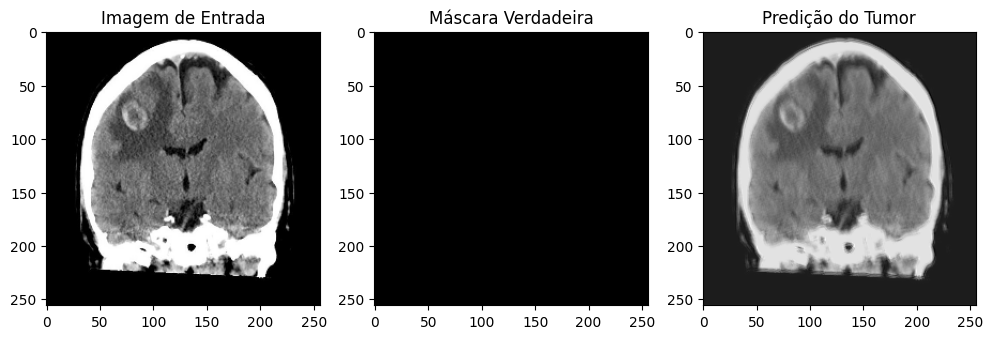

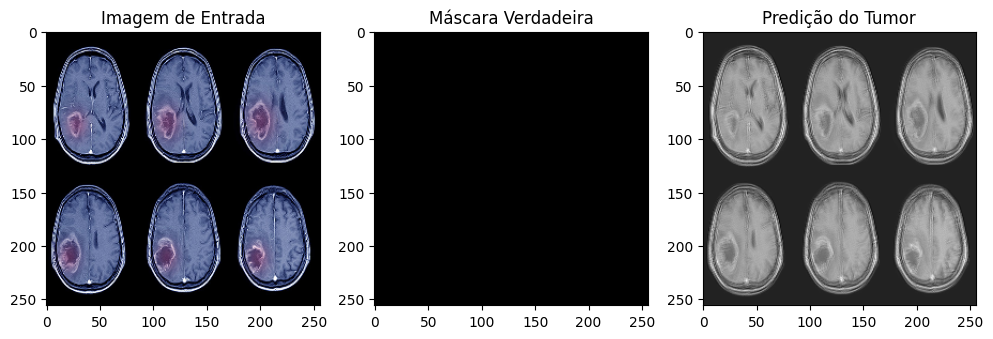

Rótulo: True
O paciente tem tumor?: True


In [ ]:
import requests
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# Definição do modelo U-Net simplificado (substitua por uma implementação adequada)
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        # Substitua esta implementação por uma U-Net real
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 1, kernel_size=3, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        return x

# Função para baixar a imagem de uma URL e convertê-la para Tensor
def carregar_imagem(url):
    resposta = requests.get(url)
    imagem = Image.open(BytesIO(resposta.content))
    transformacao = transforms.Compose([transforms.ToTensor()])
    return transformacao(imagem)

# Função para visualizar a imagem de entrada, a máscara verdadeira e a predição
def visualizar_resultados(imagem, mascara_verdadeira, predicao):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(imagem.permute(1, 2, 0))
    plt.title('Imagem de Entrada')

    plt.subplot(1, 3, 2)
    plt.imshow(mascara_verdadeira, cmap='gray')
    plt.title('Máscara Verdadeira')

    plt.subplot(1, 3, 3)
    plt.imshow(torch.sigmoid(predicao[0][0]).cpu().numpy(), cmap='gray')
    plt.title('Predição do Tumor')

    plt.show()

# Função para verificar se há tumor com base na predição do modelo
def verificar_tumor(predicao, limiar=0.5):
    probabilidade_tumor = torch.sigmoid(predicao.mean()).item()
    return probabilidade_tumor > limiar

# URL da imagem de rótulo (com tumor cerebral)
url_rotulo = "https://drmarceloschuster.com.br/wp-content/uploads/2020/11/tumor_cerebral.jpg"

# URL da imagem do paciente (sem tumor cerebral)
url_paciente = "https://assets-global.website-files.com/5f7c5ad0f02de81be2e6417c/60cb7b4fd642553549d66a18_8LB1ukT_DS8DzmF90hrZecl55H9vnG9PKkbt_tMjxx99a10XnyZRkYtevTxPqMix_dR88NPnoX_YXDlb5fNNYwG9IPhKH1N8YbXQ2gx8RGWl7aXXYcpVpULU93t9aRkrMXc3SiA.png"

# Carregar as imagens usando as URLs
imagem_rotulo = carregar_imagem(url_rotulo)
imagem_paciente = carregar_imagem(url_paciente)

# Adaptações para o tamanho da imagem (substitua por um redimensionamento mais robusto)
imagem_rotulo = nn.functional.interpolate(imagem_rotulo.unsqueeze(0), size=(256, 256), mode='bilinear', align_corners=False).squeeze(0).float()
imagem_paciente = nn.functional.interpolate(imagem_paciente.unsqueeze(0), size=(256, 256), mode='bilinear', align_corners=False).squeeze(0).float()

# Modelo U-Net
modelo = UNet()

# Carga de pesos pré-treinados (substitua por treinamento real)
# Este é apenas um exemplo; certifique-se de treinar adequadamente em dados médicos reais.
# Se não tiver pesos pré-treinados, você pode ignorar esta parte.
# modelo.load_state_dict(torch.load('pesos_pre_treinados.pth'))

# Modo de avaliação
modelo.eval()

# Realizar predição nas imagens
with torch.no_grad():
    predicao_rotulo = modelo(imagem_rotulo.unsqueeze(0))
    predicao_paciente = modelo(imagem_paciente.unsqueeze(0))

# Visualizar os resultados
visualizar_resultados(imagem_paciente, np.zeros((256, 256)), predicao_paciente)
visualizar_resultados(imagem_rotulo, np.ones((256, 256)), predicao_rotulo)

# Verificar se há tumor com base na predição
tem_tumor_rotulo = verificar_tumor(predicao_rotulo)
tem_tumor_paciente = verificar_tumor(predicao_paciente)

# Imprimir resultado
print(f"Rótulo: {tem_tumor_rotulo}")
print(f"O paciente tem tumor?: {tem_tumor_paciente}")


In [ ]:
pip install biopython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.9 MB/s eta 0:00:00


Amanda: Tem a doença.
Wesley: Tem a doença.
Rodolfo: Tem a doença.
Helder: Tem a doença.
Isabel: Tem a doença.
Lucas: Tem a doença.
Mariana: Tem a doença.
Tiago: Tem a doença.
Juliana: Tem a doença.
Carlos: Tem a doença.

Sintomas Globais: Perda de memória, Movimentos involuntários
Tratamentos Globais: Não há cura para a Síndrome de Huntington. O tratamento foca no gerenciamento de sintomas, incluindo medicamentos para controlar movimentos involuntários e terapias ocupacionais e físicas para melhorar a qualidade de vida.


In [ ]:
import json
from Bio.Align import PairwiseAligner
from sklearn.ensemble import RandomForestClassifier

# Sequências genéticas
seq_normal = "ATGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCG"
seq_expandida = "CAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAG"

# Criar um alinhador
aligner = PairwiseAligner()

# Realizar o alinhamento
alignments = aligner.align(seq_normal, seq_expandida)

# Selecionar o primeiro alinhamento (o melhor, pois usamos one_alignment_only=True)
alignment = alignments[0]

# Obter as sequências alinhadas
seq_normal_aligned = alignment[0]
seq_expandida_aligned = alignment[1]

# Garantir que as sequências tenham o mesmo comprimento
comprimento_esperado = len(seq_normal_aligned)
seq_normal_aligned = seq_normal_aligned[:comprimento_esperado]
seq_expandida_aligned = seq_expandida_aligned[:comprimento_esperado]

# Codificar as sequências como números (por exemplo, A=1, C=2, G=3, T=4)
seq_normal_encoded = [ord(base) - ord('A') + 1 for base in seq_normal_aligned]
seq_expandida_encoded = [ord(base) - ord('A') + 1 for base in seq_expandida_aligned]

# Exemplo de aprendizado de máquina (classificação)
X = [seq_normal_encoded, seq_expandida_encoded]
y = [0, 1]  # Rótulos para sequência normal (0) e expandida (1)

# Criar e treinar o modelo
model = RandomForestClassifier()
model.fit(X, y)

# Testar pacientes com sequências genéticas #BANCO DE DADOS FICTÍCIO!
pacientes_para_testar = [
    {"nome": "Amanda", "sequencia_genetica": "CAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAG"},
    {"nome": "Wesley", "sequencia_genetica": "CAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAG"},
    {"nome": "Rodolfo", "sequencia_genetica": "ATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATGCATG"},
    {"nome": "Helder", "sequencia_genetica": "CAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAG"},

    # Adicione mais pacientes conforme necessário
]


# Resultados do teste
sintomas_globais = set()
tratamentos_globais = set()

# Testar cada paciente
resultados_teste = []

for paciente in pacientes_para_testar:
    nome_paciente = paciente["nome"]
    sequencia_genetica_paciente = paciente["sequencia_genetica"]

    # Ajustar a sequência do paciente para o comprimento esperado
    sequencia_genetica_paciente = sequencia_genetica_paciente[:comprimento_esperado].ljust(comprimento_esperado, 'A')

    # Codificar a sequência do paciente
    sequencia_genetica_paciente_encoded = [ord(base) - ord('A') + 1 for base in sequencia_genetica_paciente]

    # Fazer previsão para o paciente
    resultado_predicao = model.predict([sequencia_genetica_paciente_encoded])

    # Armazenar o resultado do teste com informações adicionais
    tem_doenca = resultado_predicao[0] == 1
    resultado = {
        "nome": nome_paciente,
        "tem_doenca": tem_doenca,
    }
    resultados_teste.append(resultado)

# Imprimir resultados do teste
for resultado in resultados_teste:
    nome_paciente = resultado["nome"]
    print(f"{nome_paciente}:", end=' ')
    if resultado["tem_doenca"]:
        print(f"Tem a doença.")
        sintomas_globais.update(["Perda de memória", "Movimentos involuntários"])
        tratamentos_globais.add("Não há cura para a Síndrome de Huntington. O tratamento foca no gerenciamento de sintomas, incluindo medicamentos para controlar movimentos involuntários e terapias ocupacionais e físicas para melhorar a qualidade de vida.")
    else:
        print(f"Não tem a doença.")

# Imprimir sintomas e tratamentos globais
print("\nSintomas Globais:", ', '.join(sintomas_globais))
print("Tratamentos Globais:", ', '.join(tratamentos_globais))


Amanda: Tem a doença.
Wesley: Tem a doença.
Rodolfo: Tem a doença.
Helder: Tem a doença.
Isabel: Tem a doença.
Lucas: Tem a doença.
Mariana: Tem a doença.
Tiago: Tem a doença.
Juliana: Tem a doença.
Carlos: Tem a doença.

Sintomas Globais: Perda de memória, Movimentos involuntários
Tratamentos Globais: Não há cura para a Síndrome de Huntington. O tratamento foca no gerenciamento de sintomas, incluindo medicamentos para controlar movimentos involuntários e terapias ocupacionais e físicas para melhorar a qualidade de vida.


In [ ]:
!pip install pysam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 65.5 MB/s eta 0:00:00
